In [3]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt


In [5]:
df=pd.read_csv("./East_std.csv")
df

Unnamed: 0   Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
0              0  0.016508         0.0       0.00        0.0        0.0   
1              1  0.011288         0.0       0.00        0.0        0.0   
2              2  0.024257         0.0       0.00        0.0        0.0   
3              3  0.008667         0.0       0.00        0.0        0.0   
4              4  0.057338         0.0       0.75        0.0        0.0   
...          ...       ...         ...        ...        ...        ...   
3994        3994  0.010837         0.0       0.00        0.0        0.0   
3995        3995  0.037766         0.0       0.00        0.0        0.0   
3996        3996  0.043169         0.0       0.50        0.0        0.0   
3997        3997  0.032202         0.0       0.00        0.0        0.0   
3998        3998  0.001769         0.0       0.00        0.0        0.0   

      Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
0        0.000660     0.011628           0.000000         0.000000   
1        0.000815     0.023256           0.000000         0.000000   
2        0.015636     0.046512           0.000000         0.000000   
3        0.001896     0.011628           0.000000         0.000000   
4        0.164211     0.302326           0.067398         0.075472   
...           ...          ...                ...              ...   
3994     0.032330     0.046512           0.006490         0.018868   
3995     0.003720     0.058140           0.000000         0.000000   
3996     0.096505     0.093023           0.000000         0.000000   
3997     0.001896     0.011628           0.016225         0.018868   
3998     0.000000     0.000000           0.000000         0.000000   

      Days_since_enroll  Award?  
0              0.843742     0.0  
1              0.839884     0.0  
2              0.847842     0.0  
3              0.837955     0.0  
4              0.835905     1.0  
...                 ...     ...  
3994           0.168917     1.0  
3995           0.167953     1.0  
3996           0.168797     1.0  
3997           0.168676     0.0  
3998           0.168314     0.0  

[3999 rows x 12 columns]

In [10]:
df.columns
df.drop('Unnamed: 0',axis=1,inplace=True)

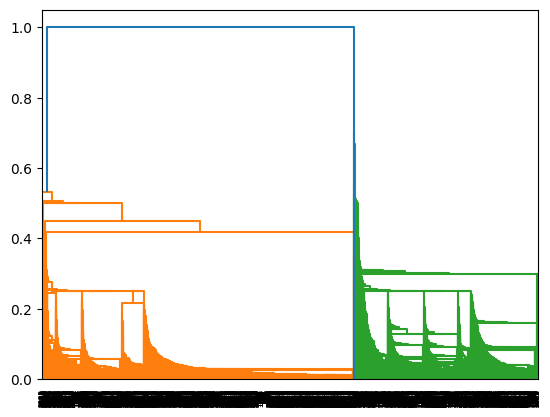

In [15]:
from scipy.cluster import hierarchy
linkage=hierarchy.linkage(df,"single")
clusters_info = hierarchy.dendrogram(linkage)

In [24]:
from sklearn.cluster import AgglomerativeClustering
model1 = AgglomerativeClustering(n_clusters=5, linkage='complete')
model1.fit(df)

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [28]:
from sklearn.cluster import DBSCAN
model=DBSCAN(eps=0.3,min_samples=12)
model.fit(df)

DBSCAN(eps=0.3, min_samples=12)

In [29]:
model.labels_

array([0, 0, 0, ..., 1, 0, 0])

Text(0.5, 0.5, 'Award')

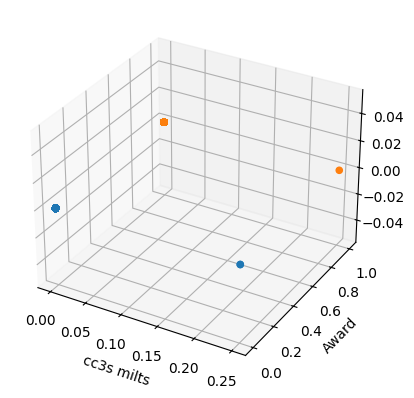

In [32]:
figure=plt.figure()
ax=figure.add_subplot(111,projection="3d")
# color=["red","green"]
for index in range(len(color)):
    ax.scatter (df['cc3_miles'][model.labels_ ==index],df['Award?'][model.labels_ == index])
plt.xlabel("cc3s milts")
plt.ylabel("Award")